# 1.1 合并数据

In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
print(train.shape)
test = pd.read_csv("test.csv")
print(test.shape)
alldata = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)
print(alldata.shape)
print(train.describe())

(1460, 81)
(1459, 80)
(2919, 79)
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645

# 1.2 pd.describe() 查看数据情况

In [2]:
explore = train.describe(include = 'all').T
explore['null'] = len(train) - explore['count']
explore.insert(0,'dtype',train.dtypes)
print(explore.T)
explore.T.to_csv('explore1.csv')

explore = alldata.describe(include = 'all').T
explore['null'] = len(alldata) - explore['count']
explore.insert(0,'dtype',alldata.dtypes)
explore.T.to_csv('explore2.csv')
print(explore.T)

             Id MSSubClass MSZoning LotFrontage  LotArea  Street   Alley  \
dtype     int64      int64   object     float64    int64  object  object   
count      1460       1460     1460        1201     1460    1460      91   
unique      NaN        NaN        5         NaN      NaN       2       2   
top         NaN        NaN       RL         NaN      NaN    Pave    Grvl   
freq        NaN        NaN     1151         NaN      NaN    1454      50   
mean      730.5    56.8973      NaN       70.05  10516.8     NaN     NaN   
std      421.61    42.3006      NaN     24.2848  9981.26     NaN     NaN   
min           1         20      NaN          21     1300     NaN     NaN   
25%      365.75         20      NaN          59   7553.5     NaN     NaN   
50%       730.5         50      NaN          69   9478.5     NaN     NaN   
75%     1095.25         70      NaN          80  11601.5     NaN     NaN   
max        1460        190      NaN         313   215245     NaN     NaN   
null        

# 1.3 计算各特征对应缺失值占比，返回前20的情况

In [3]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# 1.4 查看corr()相关矩阵

In [4]:
import matplotlib.pyplot as plt
import  seaborn as sns
import  numpy as np
# 相关图
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.savefig('train_corr.png')

#查看影响最终价格的十个变量
k = 10
plt.figure(figsize=(12,9))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
# cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(train[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


<Figure size 1200x900 with 2 Axes>

<Figure size 1200x900 with 2 Axes>

# 1.5 相关矩阵相似度大于0.5的数据

In [5]:
Corr = train.corr()
Corr[Corr['SalePrice']>0.5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


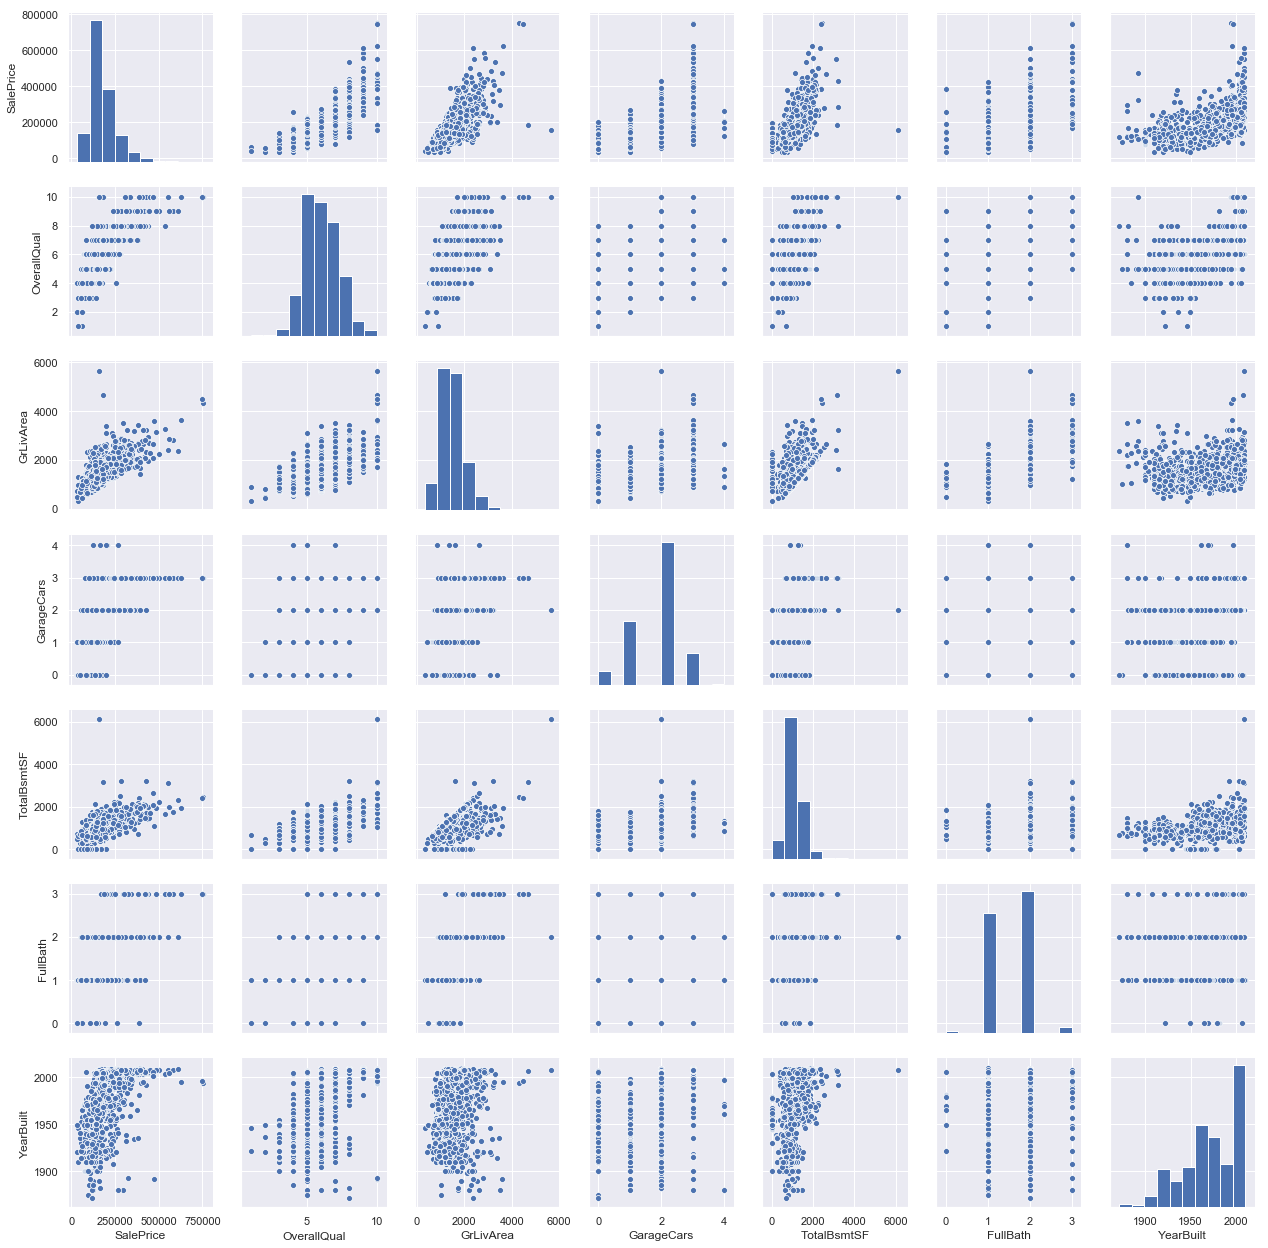

In [6]:
#scatterplot 绘制散点图矩阵注意：多变量作图数据中不能有空值，否则出错
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

# 1.6 标签分布分析

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

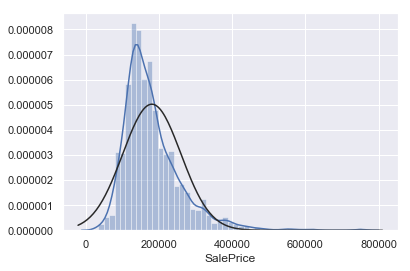

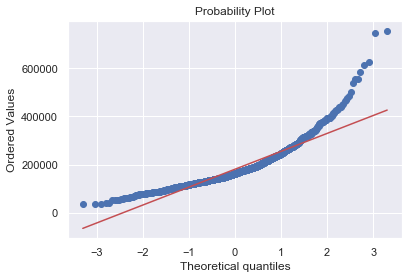

In [8]:
#scipy库中stats对象的.probplot() 方法拟合一个高斯正态分布，以SalePrice为例
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
#histogram画直方图,且查看数据是否符合正态分布
# 直方图和正态概率图
sns.distplot(train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
 
##  由图像可知，图像的非正态分布

In [9]:
# 偏度和峰度
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- 研究SalePrice和GrLivArea的关系

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


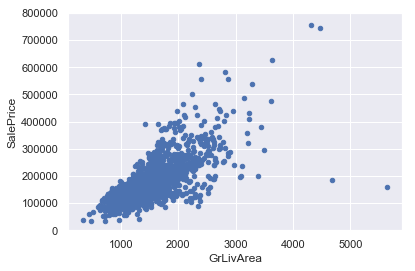

In [10]:
# 研究SalePrice和GrLivArea的关系
data1 = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data1.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

 
##  由散点图可知，图像的右下角存在两个异常值，建议去除；图像非正态分布

- 研究SalePrice和TotalBsmtSF的关系

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


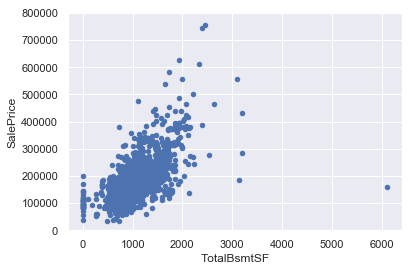

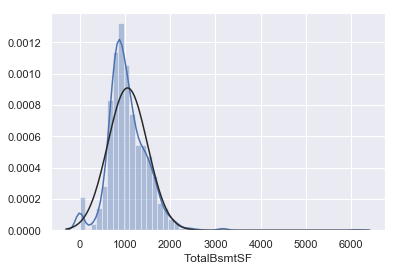

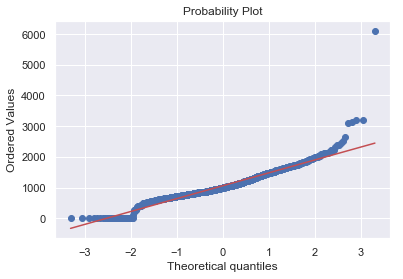

In [11]:
# 研究SalePrice和TotalBsmtSF的关系
data1 = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data1.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));
 
# 直方图和正态概率图，查看是否正态分布
fig = plt.figure()
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)
 
##  由散点图可知，图像的右下角存在1个异常值，建议去除该记录；图像非正态分布

- 研究SalePrice和OverallQual的关系

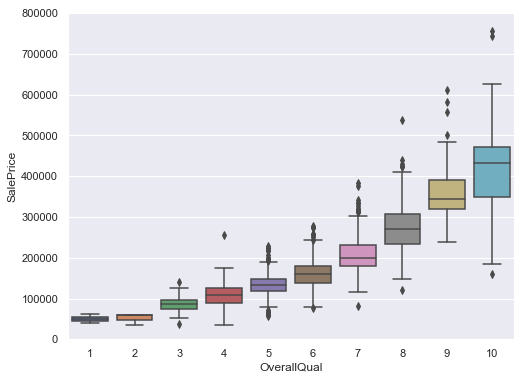

In [12]:
# 研究SalePrice和OverallQual的关系
data2 = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data2)
fig.axis(ymin=0, ymax=800000);

# 1.7 查看不同月份的房子的销售量

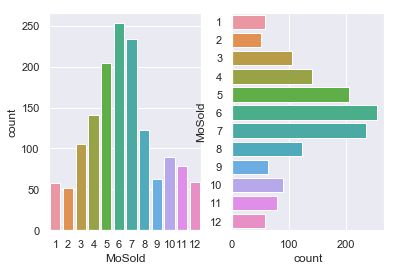

In [13]:
# 查看不同月份的房子的销售量
train.groupby('MoSold')['SalePrice'].count()
#一个计数图可以被认为是一个分类直方图，而不是定量的变量。
#基本的api和选项与barplot（）相同，因此您可以比较嵌套变量中的计数。
#（工作原理就是对输入的数据分类，条形图显示各个分类的数量）具体用法如下：
fig,axes=plt.subplots(1,2)
sns.countplot(x="MoSold",data=train,ax=axes[0]) #左图
sns.countplot(y="MoSold",data=train,ax=axes[1])  #右图
plt.show()

# 2. 数据质量分析

### 2.1 缺失值分布

In [14]:
#查看缺失值情况
def missing_values(alldata):
    alldata_na = pd.DataFrame(alldata.isnull().sum(), columns={'missingNum'})
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(alldata)*100
    alldata_na['existNum'] = len(alldata) - alldata_na['missingNum']
    
    alldata_na['train_notna'] = len(train) - train.isnull().sum()
    alldata_na['test_notna'] = alldata_na['existNum'] - alldata_na['train_notna'] 
    alldata_na['dtype'] = alldata.dtypes
    
    alldata_na = alldata_na[alldata_na['missingNum']>0].reset_index().sort_values(by=['missingNum','index'],ascending=[False,True])
    alldata_na.set_index('index',inplace=True)
    return alldata_na
 
alldata_na = missing_values(alldata)
alldata_na

,missingNum,missingRatio,existNum,train_notna,test_notna,dtype
index,,,,,,
PoolQC,2909,99.657417,10,7,3,object
MiscFeature,2814,96.402878,105,54,51,object
Alley,2721,93.216855,198,91,107,object
Fence,2348,80.438506,571,281,290,object
FireplaceQu,1420,48.646797,1499,770,729,object
LotFrontage,486,16.649538,2433,1201,1232,float64
GarageCond,159,5.447071,2760,1379,1381,object
GarageFinish,159,5.447071,2760,1379,1381,object
GarageQual,159,5.447071,2760,1379,1381,object


In [15]:
# 2.2 对于pool相关空值

In [16]:
# 查看各个poolQC的分布情况
print(alldata['PoolQC'].value_counts())
print()
# PoolArea的均值
poolqc = alldata.groupby('PoolQC')['PoolArea'].mean()
print('不同poolqc的PoolArea的均值',poolqc)
print()

# 查看有PoolArea数据但是没有poolQC的数据
poolqcna = alldata[(alldata['PoolQC'].isnull())& (alldata['PoolArea']!=0)][['PoolQC','PoolArea']]
print('查看有PoolArea数据但是没有poolQC的数据',poolqcna)
print()

# 查看无PoolArea数据但是有poolQC的数据
poolareana = alldata[(alldata['PoolQC'].notnull()) & (alldata['PoolArea']==0)][['PoolQC','PoolArea']]
print('查看无PoolArea数据但是有poolQC的数据',poolareana)
print()

# 查看是否有'PoolQC'不空，PoolArea为空的
print('查看是否有PoolQC不空，PoolArea为空的',alldata[(alldata['PoolQC'].notnull()) & (alldata['PoolArea']==0)][['PoolQC','PoolArea']])
 
 
# 由结果可知，PoolQC有三种取值，存在3个值QC为空，Area不为空,以PoolQC进行分组，计算PoolArea的均值，最小距离


Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

不同poolqc的PoolArea的均值 PoolQC
Ex    359.75
Fa    583.50
Gd    648.50
Name: PoolArea, dtype: float64

查看有PoolArea数据但是没有poolQC的数据      PoolQC  PoolArea
2420    NaN       368
2503    NaN       444
2599    NaN       561

查看无PoolArea数据但是有poolQC的数据 Empty DataFrame
Columns: [PoolQC, PoolArea]
Index: []

查看是否有PoolQC不空，PoolArea为空的 Empty DataFrame
Columns: [PoolQC, PoolArea]
Index: []


## 2.2 找出所有Garage前缀的属性

In [17]:
# 找出所有Garage前缀的属性
a = pd.Series(alldata.columns)
GarageList = a[a.str.contains('Garage')].values
print(GarageList)
 
# -step1 GarageYrBlt	车库建造年份
print(alldata_na.ix[GarageList,:])
# -step2:检查GarageArea、GarageCars均为0的，其他类别列的空值均填充“none”，数值列填“0”
print(len(alldata[(alldata['GarageArea']==0) & (alldata['GarageCars']==0)]))# 157
print(len(alldata[(alldata['GarageArea']!=0) & (alldata['GarageCars'].isnull==True)])) # 0
 
# 'GarageYrBlt'到后来与年份一起处理，也有空值

['GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea'
 'GarageQual' 'GarageCond']
              missingNum  missingRatio  existNum  train_notna  test_notna  \
index                                                                       
GarageType           157      5.378554      2762         1379        1383   
GarageYrBlt          159      5.447071      2760         1379        1381   
GarageFinish         159      5.447071      2760         1379        1381   
GarageCars             1      0.034258      2918         1460        1458   
GarageArea             1      0.034258      2918         1460        1458   
GarageQual           159      5.447071      2760         1379        1381   
GarageCond           159      5.447071      2760         1379        1381   

                dtype  
index                  
GarageType     object  
GarageYrBlt   float64  
GarageFinish   object  
GarageCars    float64  
GarageArea    float64  
GarageQual     object  
GarageCond     ob

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


## 2.3 找出所有Bsmt前缀的属性

In [18]:
# 找出所有Bsmt前缀的属性
a = pd.Series(alldata.columns)
BsmtList = a[a.str.contains('Bsmt')].values
print(BsmtList)
allBsmtNa = alldata_na.ix[BsmtList,:]
print(allBsmtNa)


condition = (alldata['BsmtExposure'].isnull()) & (alldata['BsmtCond'].notnull())
alldata[condition][BsmtList]

# 通过研究发现，BsmtExposure为空时，有三行数据其他值不为空，取众数填充

['BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1'
 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'BsmtFullBath'
 'BsmtHalfBath']
              missingNum  missingRatio  existNum  train_notna  test_notna  \
index                                                                       
BsmtQual              81      2.774923      2838         1423        1415   
BsmtCond              82      2.809181      2837         1423        1414   
BsmtExposure          82      2.809181      2837         1422        1415   
BsmtFinType1          79      2.706406      2840         1423        1417   
BsmtFinSF1             1      0.034258      2918         1460        1458   
BsmtFinType2          80      2.740665      2839         1422        1417   
BsmtFinSF2             1      0.034258      2918         1460        1458   
BsmtUnfSF              1      0.034258      2918         1460        1458   
TotalBsmtSF            1      0.034258      2918         1460        1458   


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1487,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
2348,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


In [19]:
#Bsmt数据有空值，判断它为空值时其他列的值的情况

In [20]:
condition1 = (alldata['BsmtCond'].isnull()) & (alldata['BsmtExposure'].notnull())
print(len(alldata[alldata['BsmtCond']==alldata['BsmtQual']])) 
alldata[condition1][BsmtList]
# 通过研究发现，BsmtCond为空时，有三行数据其他值不为空# 有1265个值的BsmtQual == BsmtCond，所以对应填充

1265


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2040,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
2185,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
2524,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [21]:
condition2 = (alldata['BsmtQual'].isnull()) & (alldata['BsmtExposure'].notnull())
alldata[condition2][BsmtList]
# 通过研究发现，BsmtQual为空时，有两行数据其他值不为空，填充方法与condition1类似

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2217,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
2218,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [22]:
# 其他剩下的字段考虑数值型空值填0，标称型空值填none
print(alldata['BsmtFinSF1'].value_counts().head(5))# 空值填0
 
print(alldata['BsmtFinSF2'].value_counts().head(5))# 空值填0
 
print(alldata['BsmtFullBath'].value_counts().head(5))# 空值填0
 
print(alldata['BsmtHalfBath'].value_counts().head(5))# 空值填0
 
print(alldata['BsmtFinType1'].value_counts().head(5)) # 空值填众数
 
print(alldata['BsmtFinType2'].value_counts().head(5)) # 空值填众数

0.0      929
24.0      27
16.0      14
300.0      9
288.0      8
Name: BsmtFinSF1, dtype: int64
0.0      2571
294.0       5
180.0       5
162.0       3
539.0       3
Name: BsmtFinSF2, dtype: int64
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64
0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
Name: BsmtFinType2, dtype: int64


## 2.4 MasVnrType	砖石类型 MasVnrArea	砖石面积

In [23]:
print(alldata[['MasVnrType', 'MasVnrArea']].isnull().sum())
print()

print(len(alldata[(alldata['MasVnrType'].isnull())& (alldata['MasVnrArea'].isnull())])) # 23
 
print(len(alldata[(alldata['MasVnrType'].isnull())& (alldata['MasVnrArea'].notnull())]))
 
print(len(alldata[(alldata['MasVnrType'].notnull())& (alldata['MasVnrArea'].isnull())]))
print()

print(alldata['MasVnrType'].value_counts())
print()

MasVnrM = alldata.groupby('MasVnrType')['MasVnrArea'].median()
print(MasVnrM)
print()
mtypena = alldata[(alldata['MasVnrType'].isnull())& (alldata['MasVnrArea'].notnull())][['MasVnrType','MasVnrArea']]
print(mtypena)
# 由此可知，由一条数据的 MasVnrType 为空而Area不为空，所以，填充方式按照类似poolQC和poolArea的方式，分组填充
# 其他数据中MasVnrType空值填fillna("None")，MasVnrArea空值填fillna(0)

MasVnrType    24
MasVnrArea    23
dtype: int64

23
1
0

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

MasVnrType
BrkCmn     161.0
BrkFace    203.0
None         0.0
Stone      200.0
Name: MasVnrArea, dtype: float64

     MasVnrType  MasVnrArea
2610        NaN       198.0


In [24]:
#这部分数据很奇怪，类型为“None"类型，但是Area却大于0，还有等于1的
alldata[(alldata['MasVnrType']=='None')&(alldata['MasVnrArea']!=0)][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0
1669,None,285.0
2452,None,1.0


In [25]:
#类型为“None"类型，Area的值的分布
alldata[alldata['MasVnrType']=='None']['MasVnrArea'].value_counts()

0.0      1735
1.0         3
285.0       1
312.0       1
344.0       1
288.0       1
Name: MasVnrArea, dtype: int64

## 2.5 MS**填充MSSubClass	住宅类型MSZoning	分区分类

In [26]:
print(alldata[alldata['MSSubClass'].isnull() | alldata['MSZoning'].isnull()][['MSSubClass','MSZoning']])
pd.crosstab(alldata.MSSubClass, alldata.MSZoning)#交叉表
#通过观察30/70 'RM'和20'RL'的组合较多。对应填充

      MSSubClass MSZoning
1915          30      NaN
2216          20      NaN
2250          70      NaN
2904          20      NaN


MSZoning,C (all),FV,RH,RL,RM
MSSubClass,,,,,
20,3,34,4,1016,20
30,8,0,2,61,67
40,0,0,0,4,2
45,0,0,1,6,11
50,7,0,2,159,119
60,0,43,0,529,3
70,4,0,3,57,63
75,0,0,0,9,14
80,0,0,0,115,3


## 2.6 LotFrontage

In [27]:
#考虑到LotFrontage	与街道连接的线性脚与Neighborhood	房屋附近位置 存在一定的关系
 
print(alldata[["LotFrontage", "Neighborhood"]].isnull().sum())
print(alldata["LotFrontage"].value_counts().head(5)) 
print()
print(alldata["Neighborhood"].value_counts())
# 考虑通过一定的方式来填充
# 例如：
alldata["LotFrontage"] = alldata.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

LotFrontage     486
Neighborhood      0
dtype: int64
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64


## 2.7 其他列

In [28]:
others = ['Functional','Utilities','SaleType','Electrical', "FireplaceQu",'Alley',"Fence", "MiscFeature",\
          'KitchenQual',"LotFrontage",'Exterior1st','Exterior2nd']
print(alldata[others].isnull().sum())
print()
print(alldata['Functional'].value_counts().head(5)) # 填众数
print(alldata['Utilities'].value_counts().head(5)) # 填众数
print(alldata['SaleType'].value_counts().head(5)) # 填众数
print(alldata['Electrical'].value_counts().head(5)) # 填众数
print(alldata["Fence"].value_counts()) # 填众数
print(alldata["MiscFeature"].value_counts().head(5)) # 填众数
print(alldata['KitchenQual'].value_counts().head(5)) # 填众数
print(alldata['Exterior1st'].value_counts().head(5)) # 填众数
print(alldata['Exterior2nd'].value_counts().head(5)) # 填众数
print(alldata['FireplaceQu'].value_counts().head(5)) # 填'none'
print(alldata['Alley'].value_counts().head(5)) # 填'none'

Functional        2
Utilities         2
SaleType          1
Electrical        1
FireplaceQu    1420
Alley          2721
Fence          2348
MiscFeature    2814
KitchenQual       1
LotFrontage       0
Exterior1st       1
Exterior2nd       1
dtype: int64

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Name: Functional, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
WD       2525
New       239
COD        87
ConLD      26
CWD        12
Name: SaleType, dtype: int64
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64
TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406


In [29]:
alldata[alldata[alldata.columns].duplicated()==True]# 但是考虑到当前重复值后来不影响应用 所以可以不用删除

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2713,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
2865,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


# 3. 数据预处理

## 3.1 数据清洗

### 3.1.1 缺失值处理
- 对于pool相关空值

In [30]:
poolqcna = alldata[(alldata['PoolQC'].isnull())& (alldata['PoolArea']!=0)][['PoolQC','PoolArea']]
print(poolqcna)
areamean = alldata.groupby('PoolQC')['PoolArea'].mean()
print(areamean)
for i in poolqcna.index:
    v = alldata.loc[i,['PoolArea']].values
    print(type(np.abs(v-areamean)))
    alldata.loc[i,['PoolQC']] = np.abs(v-areamean).astype('float64').argmin()
    
alldata['PoolQC'] = alldata["PoolQC"].fillna("None")
alldata['PoolArea'] = alldata["PoolArea"].fillna(0)

     PoolQC  PoolArea
2420    NaN       368
2503    NaN       444
2599    NaN       561
PoolQC
Ex    359.75
Fa    583.50
Gd    648.50
Name: PoolArea, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


- 对于Garage*相关空值

In [31]:
alldata[['GarageCond','GarageFinish','GarageQual','GarageType']] = alldata[['GarageCond','GarageFinish','GarageQual','GarageType']].fillna('None')
alldata[['GarageCars','GarageArea']] = alldata[['GarageCars','GarageArea']].fillna(0)
alldata['Electrical'] = alldata['Electrical'].fillna( alldata['Electrical'].mode()[0])#众数，频数最高
 
# 注意此处'GarageYrBlt'尚未填充

- 对于Bsmt*相关空值

In [32]:
a = pd.Series(alldata.columns)
#print(a)
BsmtList = a[a.str.contains('Bsmt')].values
 
condition = (alldata['BsmtExposure'].isnull()) & (alldata['BsmtCond'].notnull()) # 3个 ##True Flase
alldata.ix[(condition),'BsmtExposure'] = alldata['BsmtExposure'].mode()[0]  #BsmtExposure取众数
 
condition1 = (alldata['BsmtCond'].isnull()) & (alldata['BsmtExposure'].notnull()) # 3个
alldata.ix[(condition1),'BsmtCond'] = alldata.ix[(condition1),'BsmtQual']
 
condition2 = (alldata['BsmtQual'].isnull()) & (alldata['BsmtExposure'].notnull()) # 2个
alldata.ix[(condition2),'BsmtQual'] = alldata.ix[(condition2),'BsmtCond']
 
# 对于BsmtFinType1和BsmtFinType2
condition3 = (alldata['BsmtFinType1'].notnull()) & (alldata['BsmtFinType2'].isnull())
alldata.ix[condition3,'BsmtFinType2'] = 'Unf'
 
allBsmtNa = alldata_na.ix[BsmtList,:]
allBsmtNa_obj = allBsmtNa[allBsmtNa['dtype']=='object'].index
allBsmtNa_flo = allBsmtNa[allBsmtNa['dtype']!='object'].index
alldata[allBsmtNa_obj] =alldata[allBsmtNa_obj].fillna('None')
alldata[allBsmtNa_flo] = alldata[allBsmtNa_flo].fillna(0)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher

- MasVnr

In [33]:
MasVnrM = alldata.groupby('MasVnrType')['MasVnrArea'].median() #中位数
mtypena = alldata[(alldata['MasVnrType'].isnull())& (alldata['MasVnrArea'].notnull())][['MasVnrType','MasVnrArea']]
for i in mtypena.index:
    v = alldata.loc[i,['MasVnrArea']].values
    alldata.loc[i,['MasVnrType']] = np.abs(v-MasVnrM).astype('float64').argmin()
    
alldata['MasVnrType'] = alldata["MasVnrType"].fillna("None")
alldata['MasVnrArea'] = alldata["MasVnrArea"].fillna(0)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """


- MS

In [34]:
alldata["MSZoning"] = alldata.groupby("MSSubClass")["MSZoning"].transform(lambda x: x.fillna(x.mode()[0]))
#print(alldata["MSZoning"])

- LotFrontage

In [35]:
# 使用多项式拟合填充
 
x = alldata.loc[alldata["LotFrontage"].notnull(), "LotArea"]
y = alldata.loc[alldata["LotFrontage"].notnull(), "LotFrontage"]
t = (x <= 25000) & (y <= 150)
p = np.polyfit(x[t], y[t], 1)
alldata.loc[alldata['LotFrontage'].isnull(), 'LotFrontage'] = \
np.polyval(p, alldata.loc[alldata['LotFrontage'].isnull(), 'LotArea'])

- 其他

In [36]:
alldata['KitchenQual'] = alldata['KitchenQual'].fillna(alldata['KitchenQual'].mode()[0]) # 用众数填充
alldata['Exterior1st'] = alldata['Exterior1st'].fillna(alldata['Exterior1st'].mode()[0])
alldata['Exterior2nd'] = alldata['Exterior2nd'].fillna(alldata['Exterior2nd'].mode()[0])
alldata["Functional"] = alldata["Functional"].fillna(alldata['Functional'].mode()[0])
alldata["SaleType"] = alldata["SaleType"].fillna(alldata['SaleType'].mode()[0])
alldata["Utilities"] = alldata["Utilities"].fillna(alldata['Utilities'].mode()[0])
 
alldata[["Fence", "MiscFeature"]] = alldata[["Fence", "MiscFeature"]].fillna('None')
alldata['FireplaceQu'] = alldata['FireplaceQu'].fillna('None')
alldata['Alley'] = alldata['Alley'].fillna('None')

In [37]:
print(alldata.isnull().sum()[alldata.isnull().sum()>0])
#至此， 还有一个属性未填充 # GarageYrBlt    159

year_map = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))
# 将年份对应映射
alldata.GarageYrBlt = alldata.GarageYrBlt.map(year_map)
alldata['GarageYrBlt']= alldata['GarageYrBlt'].fillna('None')# 必须 离散化之后再对应映射
print(alldata.isnull().sum())

GarageYrBlt    159
dtype: int64
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0

## 3.2 异常值处理

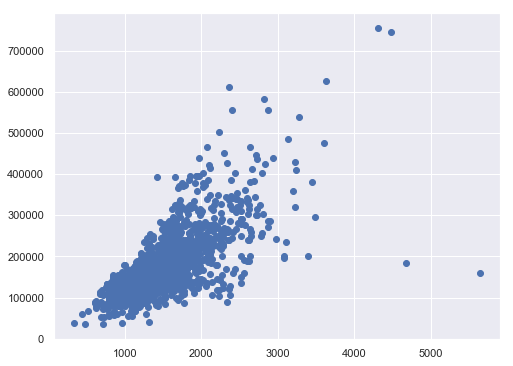

Int64Index([523, 1298], dtype='int64')


In [38]:
plt.figure(figsize=(8,6))
plt.scatter(train.GrLivArea,train.SalePrice)
plt.show()
 
# # 删除掉异常值GrLivArea>4000但是销售价格低于200000的记录
outliers_id = train[(train.GrLivArea>4000) & (train.SalePrice<200000)].index
print(outliers_id)

In [39]:
# 删除掉异常值
print(len(alldata))
alldata = alldata.drop(outliers_id)
print(len(alldata))

print(train.shape)
Y = train.SalePrice.drop(outliers_id)
train=train.drop(outliers_id)
print(train.shape)

print(Y.shape)

2919
2917
(1460, 81)
(1458, 81)
(1458,)


In [46]:
print(outliers_id)
print(Y.head())
print(alldata.shape)
#train.SalePrice.drop(train[(train.GrLivArea>4000) & (train.SalePrice<200000)])

Int64Index([523, 1298], dtype='int64')
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
(2917, 79)


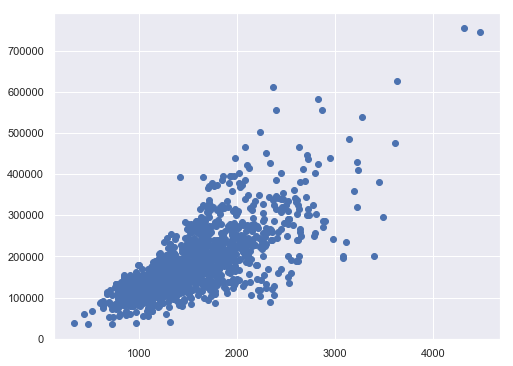

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(train.GrLivArea,train.SalePrice)
plt.show()

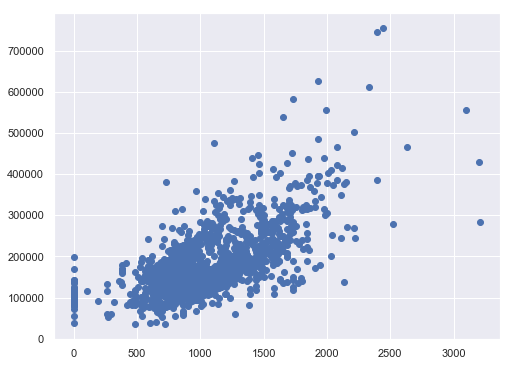

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(train.TotalBsmtSF,train.SalePrice)
plt.show()

In [42]:
#保存数据清洗后的数据，为接下来的操作准备数据集
train_now = pd.concat([alldata.iloc[:1458,:],Y], axis=1)#行对齐，然后将不同列名称的两张表合并
print(train_now.shape)
test_now = alldata.iloc[1458:,:]
train_now.to_csv('./clean_data/train_afterclean.csv')
test_now.to_csv('./clean_data/test_afterclean.csv')

(1458, 80)
